Author: Abhishek Trivedi , Shrivastava Lab

# Load in trackpy csv files
#The next eight lines allows you to load multiple videos worth of tracks

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import trackpy as tp



In [2]:
df2 = pd.read_csv('Book3.csv')
#df3 = pd.read_csv('GLDK.csv')
#df4 = pd.read_csv('Cj553Final.csv')


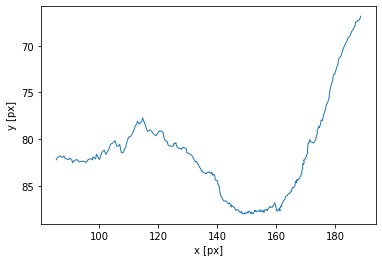

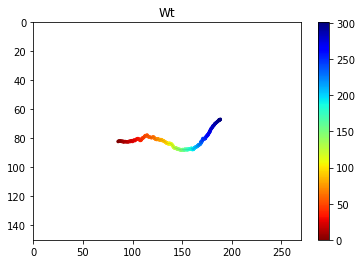

In [3]:
ax = tp.plot_traj(df2)
plt.show()
plt.plot(df2.x,df2.y, linewidth=1, c='k', alpha=0.1)
plt.scatter(df2['x'],df2['y'], s=6, c=df2['frame'], cmap="jet_r")
plt.title("Wt")
plt.xlim([0, 270])
plt.ylim([0, 150])
plt.gca().invert_yaxis()
# plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
#plt.savefig('Wt_final.jpeg', format='jpeg', dpi=300)

In [4]:
tm1=pd.DataFrame(data=df2, columns=['x', 'y', 'frame','particle'])

In [5]:
tm1.columns = ['x', 'y','frameN','particle']

In [6]:
tm2=tm1.sort_values(by=['particle','frameN'], ascending=True)

In [7]:
tm2.to_csv('tm2_Book3.csv')

In [8]:
tm2 = pd.read_csv('tm2_Book3.csv') #Only needed when reanalyzing and starting from the middle

In [9]:
tm2

,Unnamed: 0,x,y,frameN,particle
0,0,85.463625,82.211859,0,0
1,1,85.925523,81.967768,1,0
2,2,86.674143,81.788778,2,0
3,3,87.634273,81.964295,3,0
4,4,88.061204,81.788920,4,0
...,...,...,...,...,...
297,297,187.685293,67.259489,297,0
298,298,187.824749,67.265290,298,0
299,299,188.053474,67.253280,299,0
300,300,188.323810,67.097071,300,0


In [10]:
q = tm2.particle.unique()
len(q)

1

In [11]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
q = tm2.particle.unique()

speed2 = []
framesum2 = []
counter = 0

for ii in q:
    counter = counter + 1
    track=tm2.loc[tm2.particle==ii, ['frameN', 'x','y','particle']]
    x=track["x"]
    x1=np.diff(x)
    y=track["y"]
    y1=np.diff(y)
    
    dist=np.sqrt((y1)**2 + (x1)**2)
    dist=dist * 0.12    #(change pixel to micron)
    
    fr = track["frameN"]
    fr2 = np.diff(fr)
   
    frame = np.cumsum(fr2)
    framesum = frame + min(fr) 
    
    time=track["frameN"]
    time=np.diff(time)
    time =(time*0.04) #(change 1/frames per second)(#the frame rate being 25 fps
    
    
    speed =(dist/time)
    spsm = gaussian_filter1d(speed, sigma=3) # change smooth by changing sigma
    speed2+=[spsm]
    framesum2+=[framesum]

dfs = pd.DataFrame(speed2, index = q)
dft = pd.DataFrame(framesum2, index = q)
dfs.to_csv('dfs.csv')
dft.to_csv('dft.csv')


In [12]:
dfs

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,1.991868,1.968018,1.920082,1.849823,1.763866,1.674779,1.599736,1.556834,1.560013,1.613949,...,1.646154,1.540222,1.400573,1.245884,1.098079,0.976047,0.890111,0.840036,0.817037,0.809503


In [13]:
dft

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,301


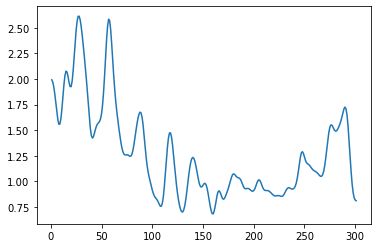

In [14]:
plt.plot(dft.iloc[0],dfs.iloc[0])

In [15]:
plt.close('all')

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 1.03421] [loc=1.278 scale=0.673]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.05 sec] [RSS: 0.664382] [loc=0.970 scale=0.526]
[distfit] >Compute confidence interval [parametric]


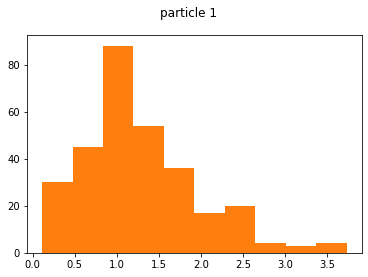

[distfit] >plot..


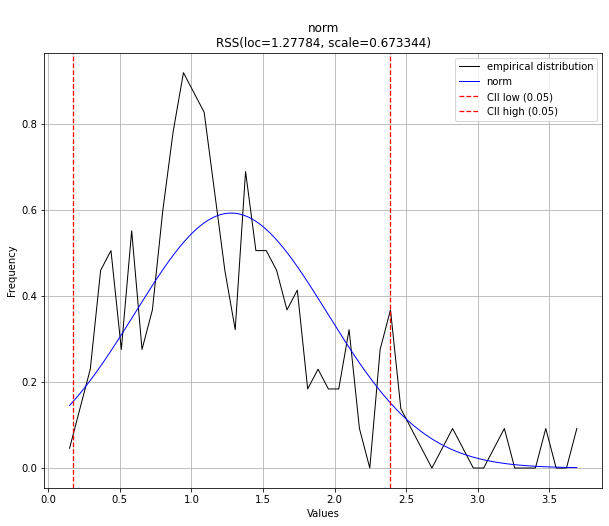

[distfit] >plot..


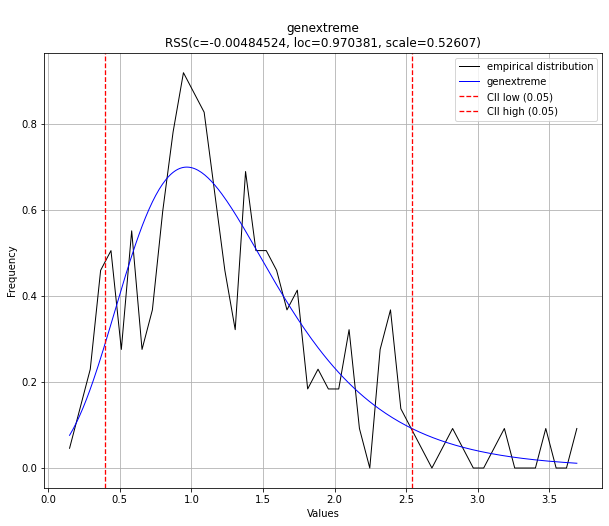

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
q=tm2.particle.unique()
mu=[]


for ii in q:
    track=tm2.loc[tm2.particle==ii, ['frameN', 'x','y','particle']]
    x=track["x"]
    x1=np.diff(x)
    y=track["y"]
    y1=np.diff(y)
    
    dist=np.sqrt((y1)**2 + (x1)**2)
    dist=dist * 0.12    #(change pixel to micron)
    
    time=track["frameN"]
    time=np.diff(time)
    time =(time*0.04) #(change 1/frames per second)(#the frame rate being 25 fps)
    
    speed =(dist/time)
    
    """in the following lines, the code prompts for user input to select the more appropriate distribution fit, 
    depending on the response, either 'normal' or 'genextreme' distribution of distfit are applied"""
   
    plt.hist(speed)
    plt.suptitle(f"particle {ii+1}")
    plt.show
    from distfit import distfit
    speed2 = distfit(distr='norm')
    speed3 = distfit(distr='genextreme')
    speed2.fit_transform(speed)
    speed3.fit_transform(speed)
    plt.hist(speed)
    plt.suptitle(f"particle {ii+1}")
    plt.show()
    speed2.plot()
    plt.show()
    speed3.plot()
    plt.show()
    mu2=speed2.model['loc']
    mu3=speed3.model['loc']
    
    selected_fit = int(input())
    #plt.close()
    if selected_fit == int(2):
        mu+=[mu2]
    else:
        mu+=[mu3]
        
#     mu +=[mu2]

    